In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from scipy import *
from scipy.interpolate import make_interp_spline, BSpline

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

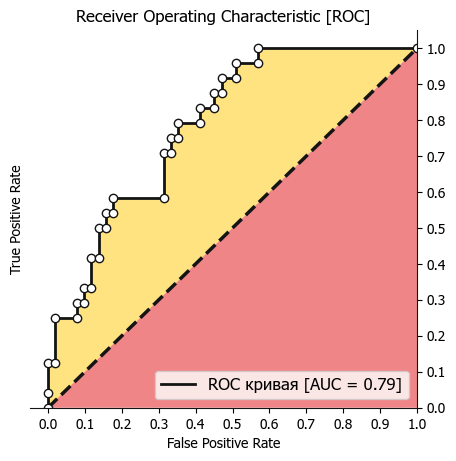

In [106]:
data = np.array([(fpr[2][i], tpr[2][i]) for i in range(fpr[2].size)]) 

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr[2], tpr[2], color='#141414', lw=2, label='ROC кривая [AUC = %0.2f]' % roc_auc[2], linestyle='-')

draw_polygon(data, color='none', fill = "#ffc903", alpha = 0.5)
draw_polygon(np.array([[0.0, 0.0], [1.0, 1.0], [1.0, 0.0]]), color='none', fill = "#e30d12", alpha = 0.5)

# Прямая x = y
plt.plot([0, 1], [0, 1], lw=2.5, color='#141414', linestyle='--')
plt.plot(data[:,0], data[:,1], 'ob', color='#141414', MarkerSize=6, MarkerEdgeColor='#141414', MarkerFaceColor='white')


plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks([i/10 for i in range(11)])
plt.yticks([i/10 for i in range(11)])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic [ROC]')

ax = plt.gca()
ax.set_facecolor('white')
ax.spines['right'].set_color('#141414')
ax.spines['bottom'].set_color('#141414')
ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('right') # Ось OY теперь слева.
plt.rc('font', family='Tahoma')
plt.legend(loc='lower right', fontsize=12, ncol=2)

# plt.show()
plt.savefig("test.svg", format="svg")


In [6]:
fpr[2]

array([0.        , 0.        , 0.        , 0.01960784, 0.01960784,
       0.07843137, 0.07843137, 0.09803922, 0.09803922, 0.11764706,
       0.11764706, 0.1372549 , 0.1372549 , 0.15686275, 0.15686275,
       0.17647059, 0.17647059, 0.31372549, 0.31372549, 0.33333333,
       0.33333333, 0.35294118, 0.35294118, 0.41176471, 0.41176471,
       0.45098039, 0.45098039, 0.47058824, 0.47058824, 0.50980392,
       0.50980392, 0.56862745, 0.56862745, 1.        ])

In [7]:
tpr[2]

array([0.        , 0.04166667, 0.125     , 0.125     , 0.25      ,
       0.25      , 0.29166667, 0.29166667, 0.33333333, 0.33333333,
       0.41666667, 0.41666667, 0.5       , 0.5       , 0.54166667,
       0.54166667, 0.58333333, 0.58333333, 0.70833333, 0.70833333,
       0.75      , 0.75      , 0.79166667, 0.79166667, 0.83333333,
       0.83333333, 0.875     , 0.875     , 0.91666667, 0.91666667,
       0.95833333, 0.95833333, 1.        , 1.        ])

In [65]:
# Метод из лабораторной работы для построения графиков.
def draw_polygon(points, color='black', fill = "black", alpha=0.2):
    X=[item[0] for item in points] # Получаем массив координат X
#     X+=[1.0]
    X+=[X[0]] # Замыкаем многоугольник.
    Y=[item[1] for item in points] # Получаем массив координат Y
#     Y+=[0.0]
    Y+=[Y[0]] # Замыкаем многоугольник.
    plt.plot(X,Y,color) # И наконец-то соединяем все линии получая многоугольник.
    ax = plt.gca() 
    ax.fill(X,Y, fill, alpha=alpha)  

In [100]:
import matplotlib.pyplot as plt                                                                                             